# Cut region for analysis

In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.transforms import offset_copy
import seaborn as sns

import cv2 

import skimage.io
from skimage import util
from skimage.exposure import rescale_intensity,equalize_adapthist
from scipy.signal import find_peaks



plt.style.use('default')

In [2]:
INPUT="../data"
FOR_PRESENTATION="../results/for presentation"

FileList=glob(os.path.join(INPUT,"*correctedBg.tiff"))

if len(FileList)>1:
    print("error: To many correctedBg files")

    
## Find File Prefix
head, tail = os.path.split(FileList[0])
FilePrefix=tail.split("_correctedBg.tiff")[0]
print(FileList[0],FilePrefix)

('../data/supplementaryMovie5_ancestor_ALI_correctedBg.tiff', 'supplementaryMovie5_ancestor_ALI')


In [3]:
images=skimage.io.imread(FileList[0])
frames=images.shape[0]
row_dim=images.shape[1]
col_dim=images.shape[2]

print("frames",frames)
print("row_dim",row_dim)
print("col_dim",col_dim)

('frames', 127)
('row_dim', 3264)
('col_dim', 3372)


## Different row slices

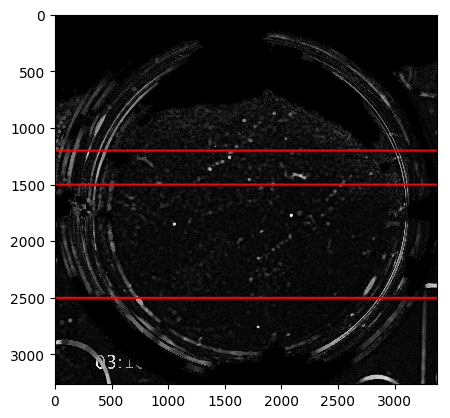

In [4]:
plt.style.use('default')

fig, ax= plt.subplots()
ax.imshow(images[20,:,:],cmap="gray")
ax.plot(np.arange(col_dim),np.repeat(1200,col_dim),color='red')
ax.plot(np.arange(col_dim),np.repeat(1500,col_dim),color='red')
ax.plot(np.arange(col_dim),np.repeat(2500,col_dim),color='red')

plt.savefig(os.path.join(FOR_PRESENTATION,"Row_slices_viz.png"),bbox='tight')


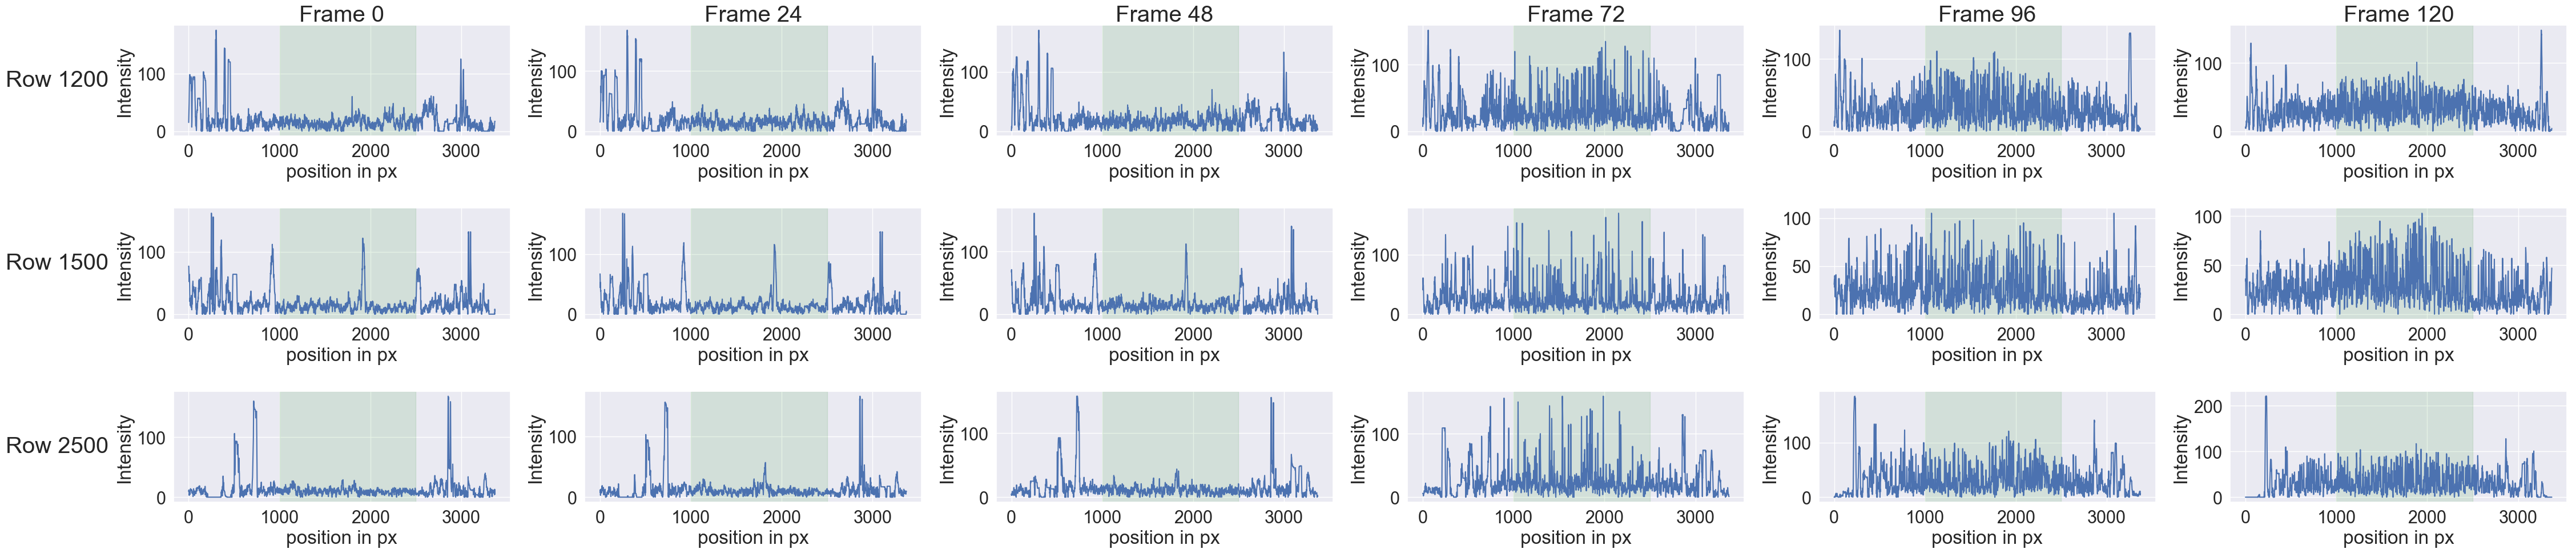

In [5]:
# intensity slice of the time
sns.set(font_scale=2) 
cols = ['Frame {}'.format(col) for col in range(0,frames,24)]
rows = ['Row {}'.format(row) for row in ['1200', '1500', '2500']]

fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(50,10))
plt.setp(axes.flat, xlabel='position in px', ylabel='Intensity')

pad = 5 # in points

for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.tight_layout()
# tight_layout doesn't take these labels into account. We'll need 
# to make some room. These numbers are are manually tweaked. 
# You could automatically calculate them, but it's a pain.
fig.subplots_adjust(left=0.15, top=0.95)




counter=0
start=1000
end=2500
for i in range(0,frames,24):
    axes[0,counter].plot(images[i,1200,:],label=str(i))
    axes[0,counter].axvspan(start, end, color='green', alpha=0.1)
    axes[1,counter].plot(images[i,1500,:],label=str(i))
    axes[1,counter].axvspan(start, end, color='green', alpha=0.1)
    axes[2,counter].plot(images[i,2500,:],label=str(i))
    axes[2,counter].axvspan(start, end, color='green', alpha=0.1)
    counter=counter+1
    
plt.savefig(os.path.join(FOR_PRESENTATION,"Row_slices.png"),bbox='tight')

## Different column slices

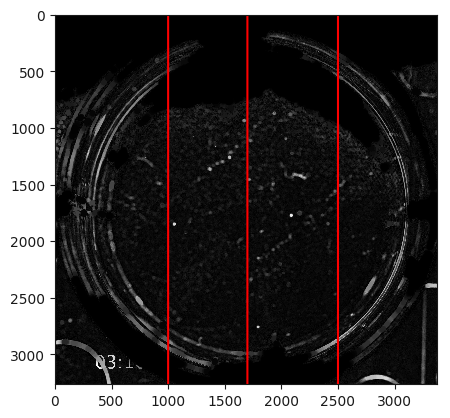

In [6]:
plt.style.use('default')

fig, ax= plt.subplots()
ax.imshow(images[20,:,:],cmap="gray")
ax.plot(np.repeat(1000,row_dim),np.arange(row_dim),color='red')
ax.plot(np.repeat(1700,row_dim),np.arange(row_dim),color='red')
ax.plot(np.repeat(2500,row_dim),np.arange(row_dim),color='red')


plt.savefig(os.path.join(FOR_PRESENTATION,"Col_slices_viz.png"),bbox='tight')


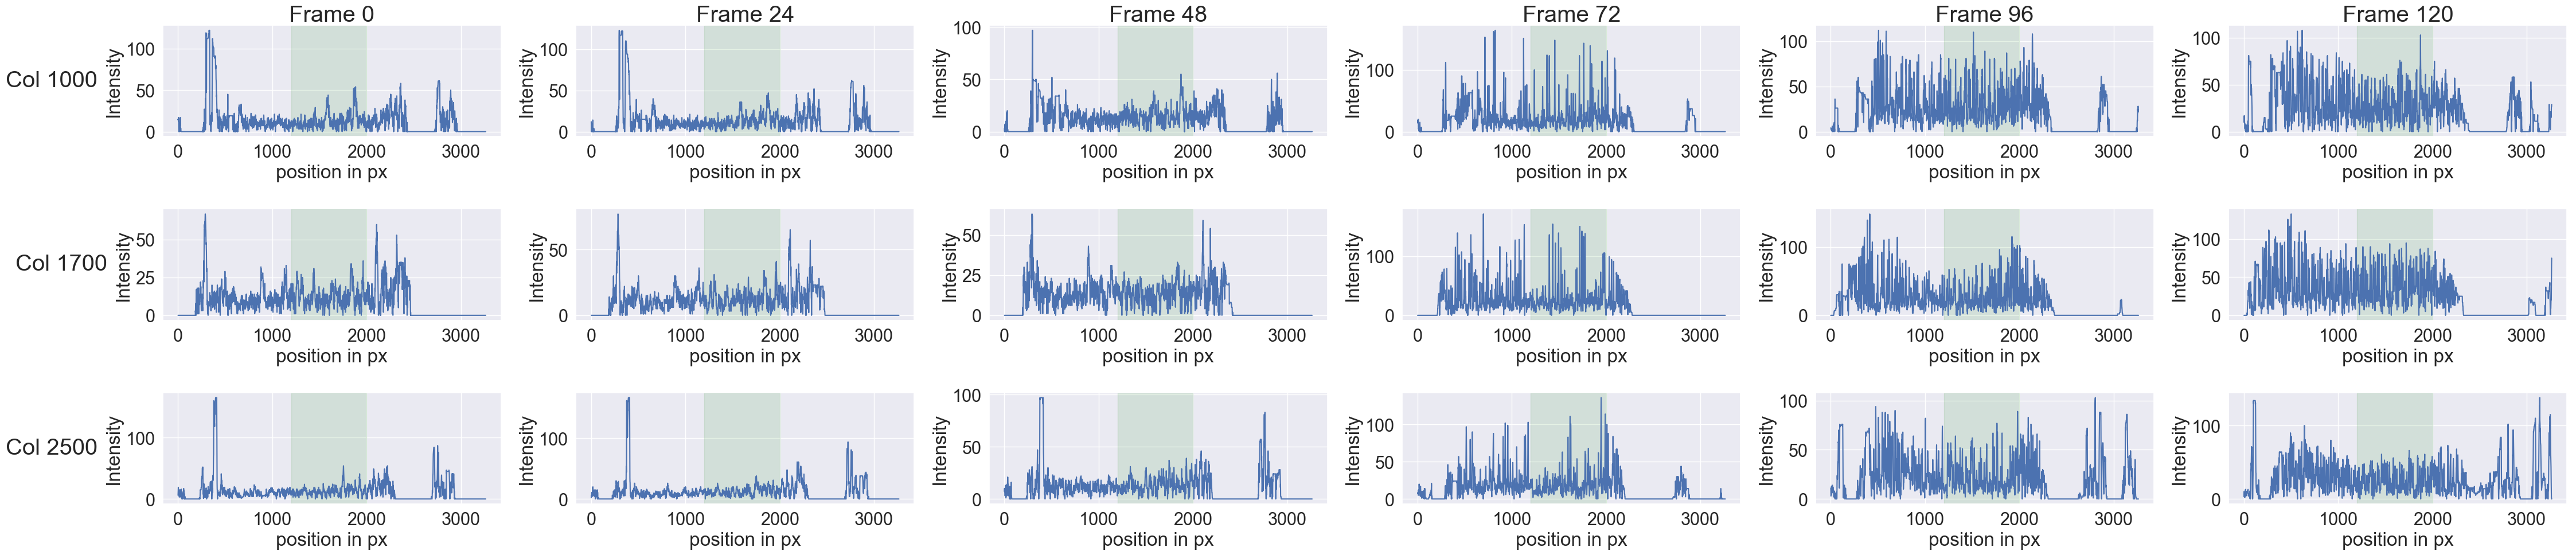

In [7]:
# intensity slice of the time
sns.set(font_scale=2) 
cols = ['Frame {}'.format(col) for col in range(0,frames,24)]
rows = ['Col {}'.format(row) for row in ['1000', '1700', '2500']]

fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(50,10))
plt.setp(axes.flat, xlabel='position in px', ylabel='Intensity')

pad = 5 # in points

for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.tight_layout()
# tight_layout doesn't take these labels into account. We'll need 
# to make some room. These numbers are are manually tweaked. 
# You could automatically calculate them, but it's a pain.
fig.subplots_adjust(left=0.15, top=0.95)

# intensity slice of the time
counter=0
start=1200
end=2000
for i in range(0,frames,24):
    axes[0,counter].plot(np.arange(row_dim,0,-1),images[i,:,1000],label=str(i))
    axes[0,counter].axvspan(start, end, color='green', alpha=0.1)
    axes[1,counter].plot(np.arange(row_dim,0,-1),images[i,:,1500],label=str(i))
    axes[1,counter].axvspan(start, end, color='green', alpha=0.1)
    axes[2,counter].plot(np.arange(row_dim,0,-1),images[i,:,2500],label=str(i))
    axes[2,counter].axvspan(start, end, color='green', alpha=0.1)
    counter=counter+1
    
plt.savefig(os.path.join(FOR_PRESENTATION,"Col_slices.png"),bbox='tight')

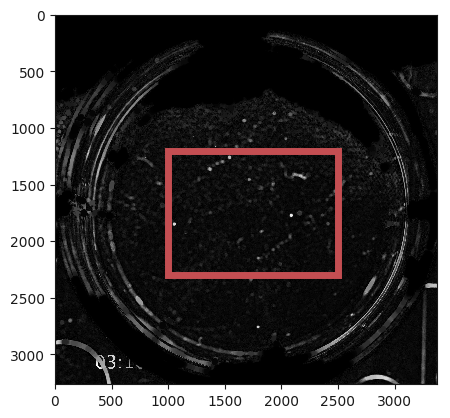

In [8]:
plt.style.use('default')
fig, ax= plt.subplots()
ax.imshow(images[20,:,:],cmap="gray")

# Create a Rectangle patch
rect =Rectangle((1000,1200),1500,1100,linewidth=5,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)






plt.savefig(os.path.join(FOR_PRESENTATION,"Patch_viz.png"),bbox='tight')

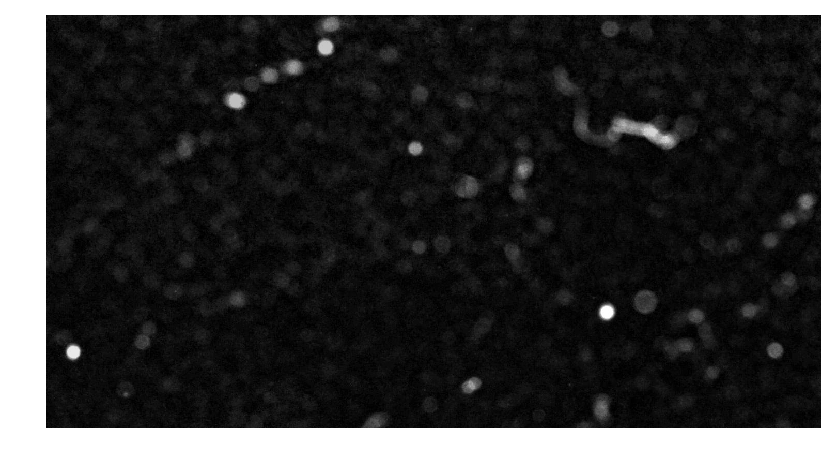

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(images[20,1200:2000,1000:2500],cmap='gray')
plt.axis('off')
plt.savefig(os.path.join(FOR_PRESENTATION,"Patch.png"),bbox='tight')

## Cut the region of interest

In [10]:
cut_the_region=images[:,1200:2000,1000:2500]
skimage.io.imsave(os.path.join(INPUT,FilePrefix)+"_cutted_region.tiff",cut_the_region,plugin="tifffile")